source: https://huggingface.co/course/chapter1/4?fw=pt

# How do Transformers work?

In this section, we will take a high-level look at the architecture of Transformer models.

## A bit of Transformer history

Here are some reference points in the (short) history of Transformer models:

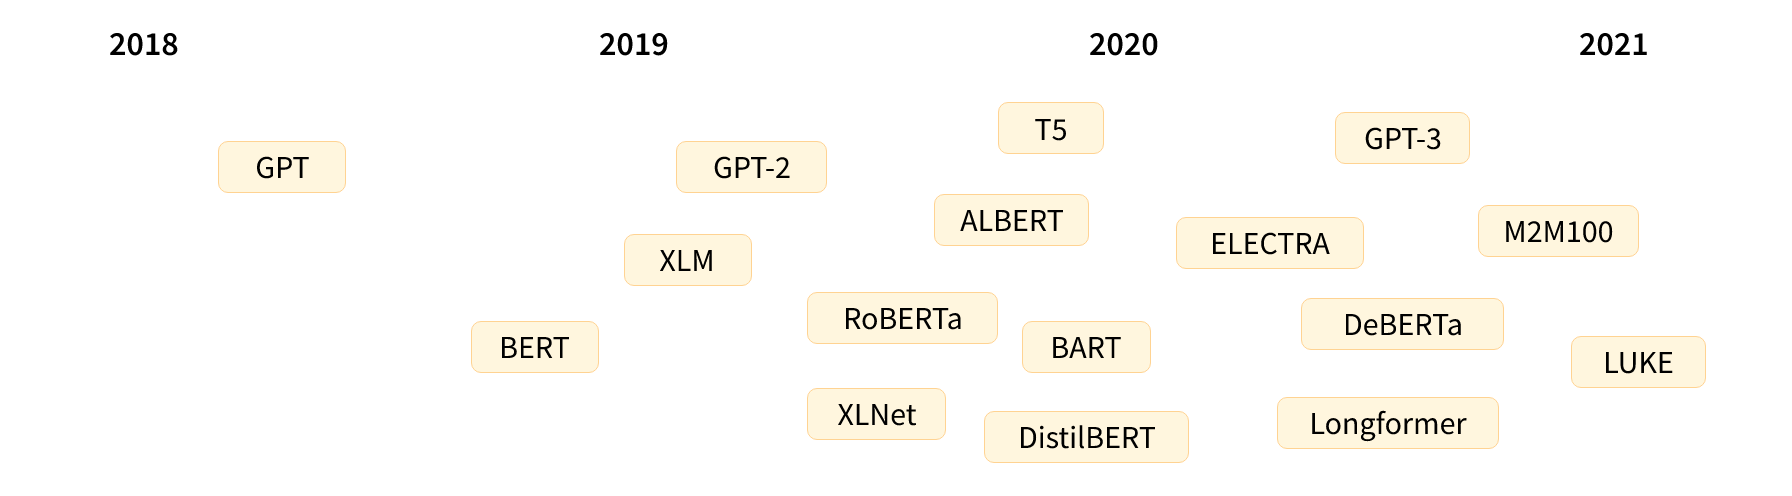

The Transformer architecture (https://arxiv.org/abs/1706.03762) was introduced in June 2017. The focus of the original research was on translation tasks. This was followed by the introduction of several influential models, including:

- **June 2018**: GPT (https://cdn.openai.com/research-covers/language-unsupervised/language_understanding_paper.pdf), the first pretrained Transformer model, used for fine-tuning on various NLP tasks and obtained state-of-the-art results.
- **October 2018**: BERT (https://arxiv.org/abs/1810.04805), another large pretrained model, this one designed to produce better summaries of sentences (more on this in the next chapter!)
- **February 2019**: GPT-2 (https://cdn.openai.com/better-language-models/language_models_are_unsupervised_multitask_learners.pdf), an improved (and bigger) version of GPT that was not immediately publicly released due to ethical concerns
- **October 2019**: DistilBERT (https://arxiv.org/abs/1910.01108), a distilled version of BERT that is 60% faster, 40% lighter in memory, and still retains 97% of BERT's performance
- **October 2019**: BART (https://arxiv.org/abs/1910.13461) and T5 (https://arxiv.org/abs/1910.10683), two large pretrained models using the same architecture as the original Transformer model (the first to do so)
- **May 2020**, GPT-3 (https://arxiv.org/abs/2005.14165), an even bigger version of GPT-2 that is able to perform well on a variety of tasks without the need for fine-tuning (called *zero-shot learning*)

This list is far from comprehensive, and is just meant to highlight a few of the different kinds of Transformer models. Broadly, they can be grouped into three categories:

- GPT-like (also called *auto-regressive* Transformer models)
- BERT-like (also called *auto-encoding* Transformer models)
- BART/T5-like (also called *sequence-to-sequence* Transformer models)

We will dive into these families in more depth later on.

## Transformers are language models

All the Transformer models mentioned above (GPT, BERT, BART, T5, etc.) have been trained as *language models*. This means they have been trained on large amounts of raw text in a self-supervised fashion. Self-supervised learning is a type of training in which the objective is automatically computed from the inputs of the model. That means that humans are not needed to label the data!

This type of model develops a statistical understanding of the language it has been trained on, but it's not very useful for specific practical tasks. Because of this, the general pretrained model then goes through a process called *transfer learning*. During this process, the model is fine-tuned in a supervised way - that is, using human-annotated labels - on a given task.

An exmaple of a task is predicting the next word in a sentence having read the *n* previous words. This is called *casual language modeling* because the output depends on the past and present inputs, but not the future ones.

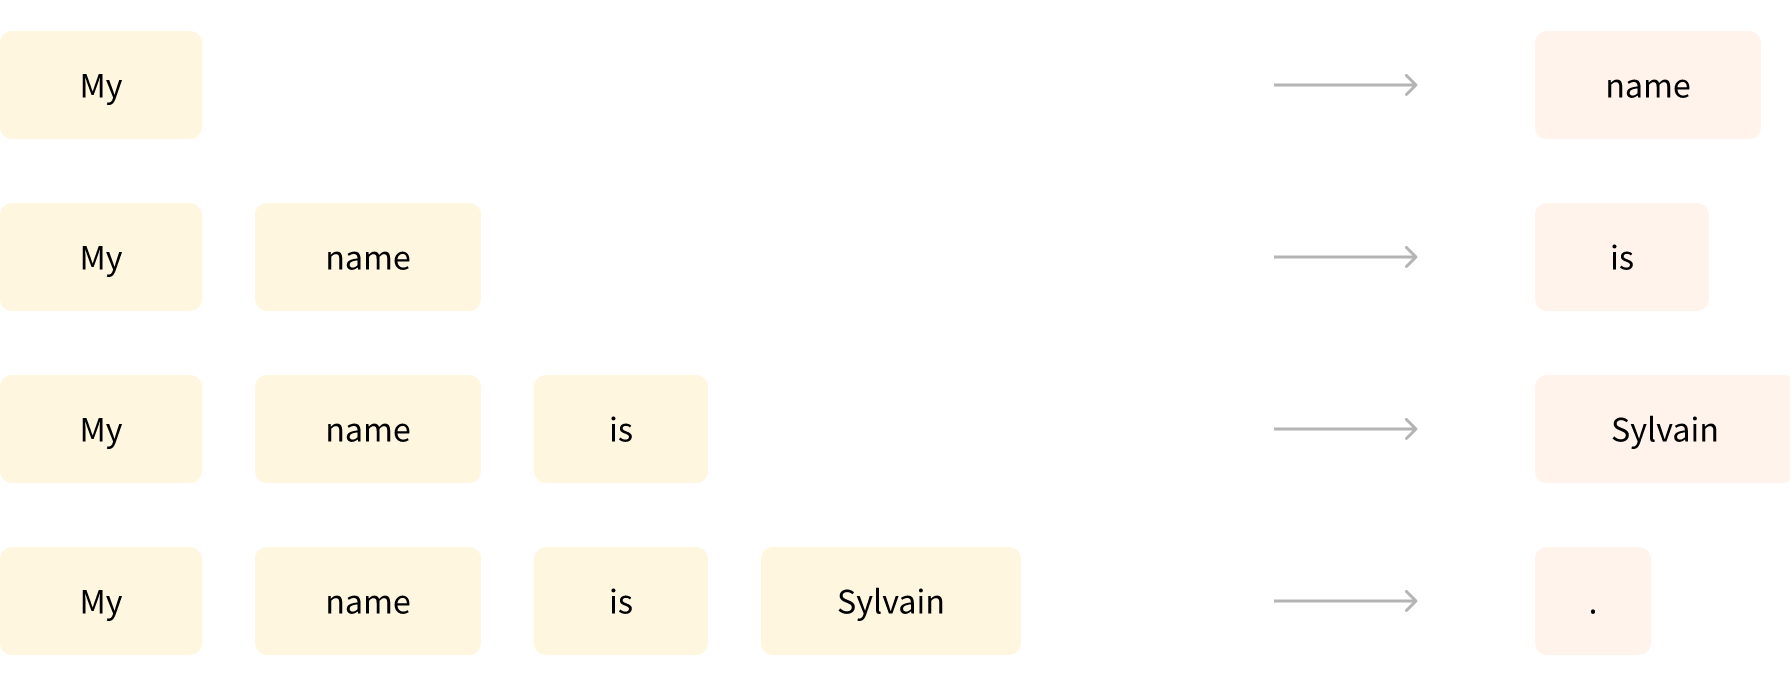

Another example is *masked language modeling*, in which the model predicts a masked word in the sentence.

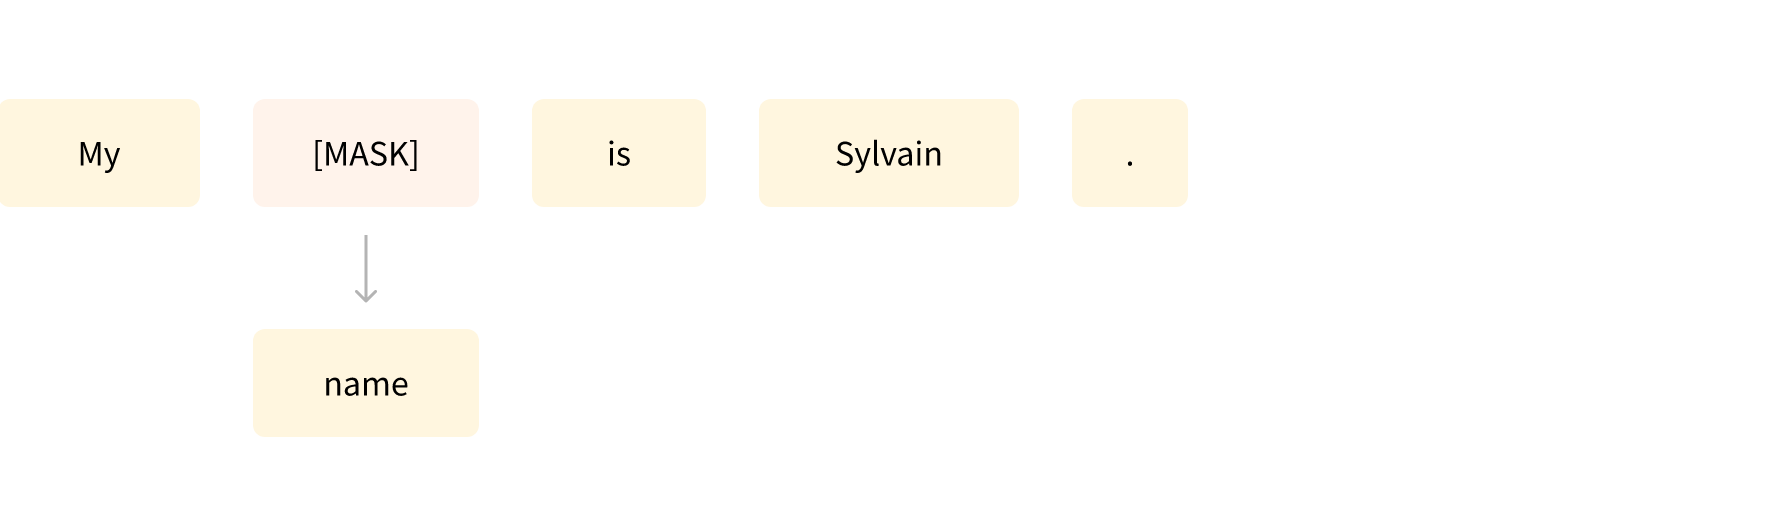

## Transformers are big models

Apart from a few outliers (like DistilBERT), the general strategy to achieve better performance is by increasing the models' sizes as well as the amount of data they are pretrained in.

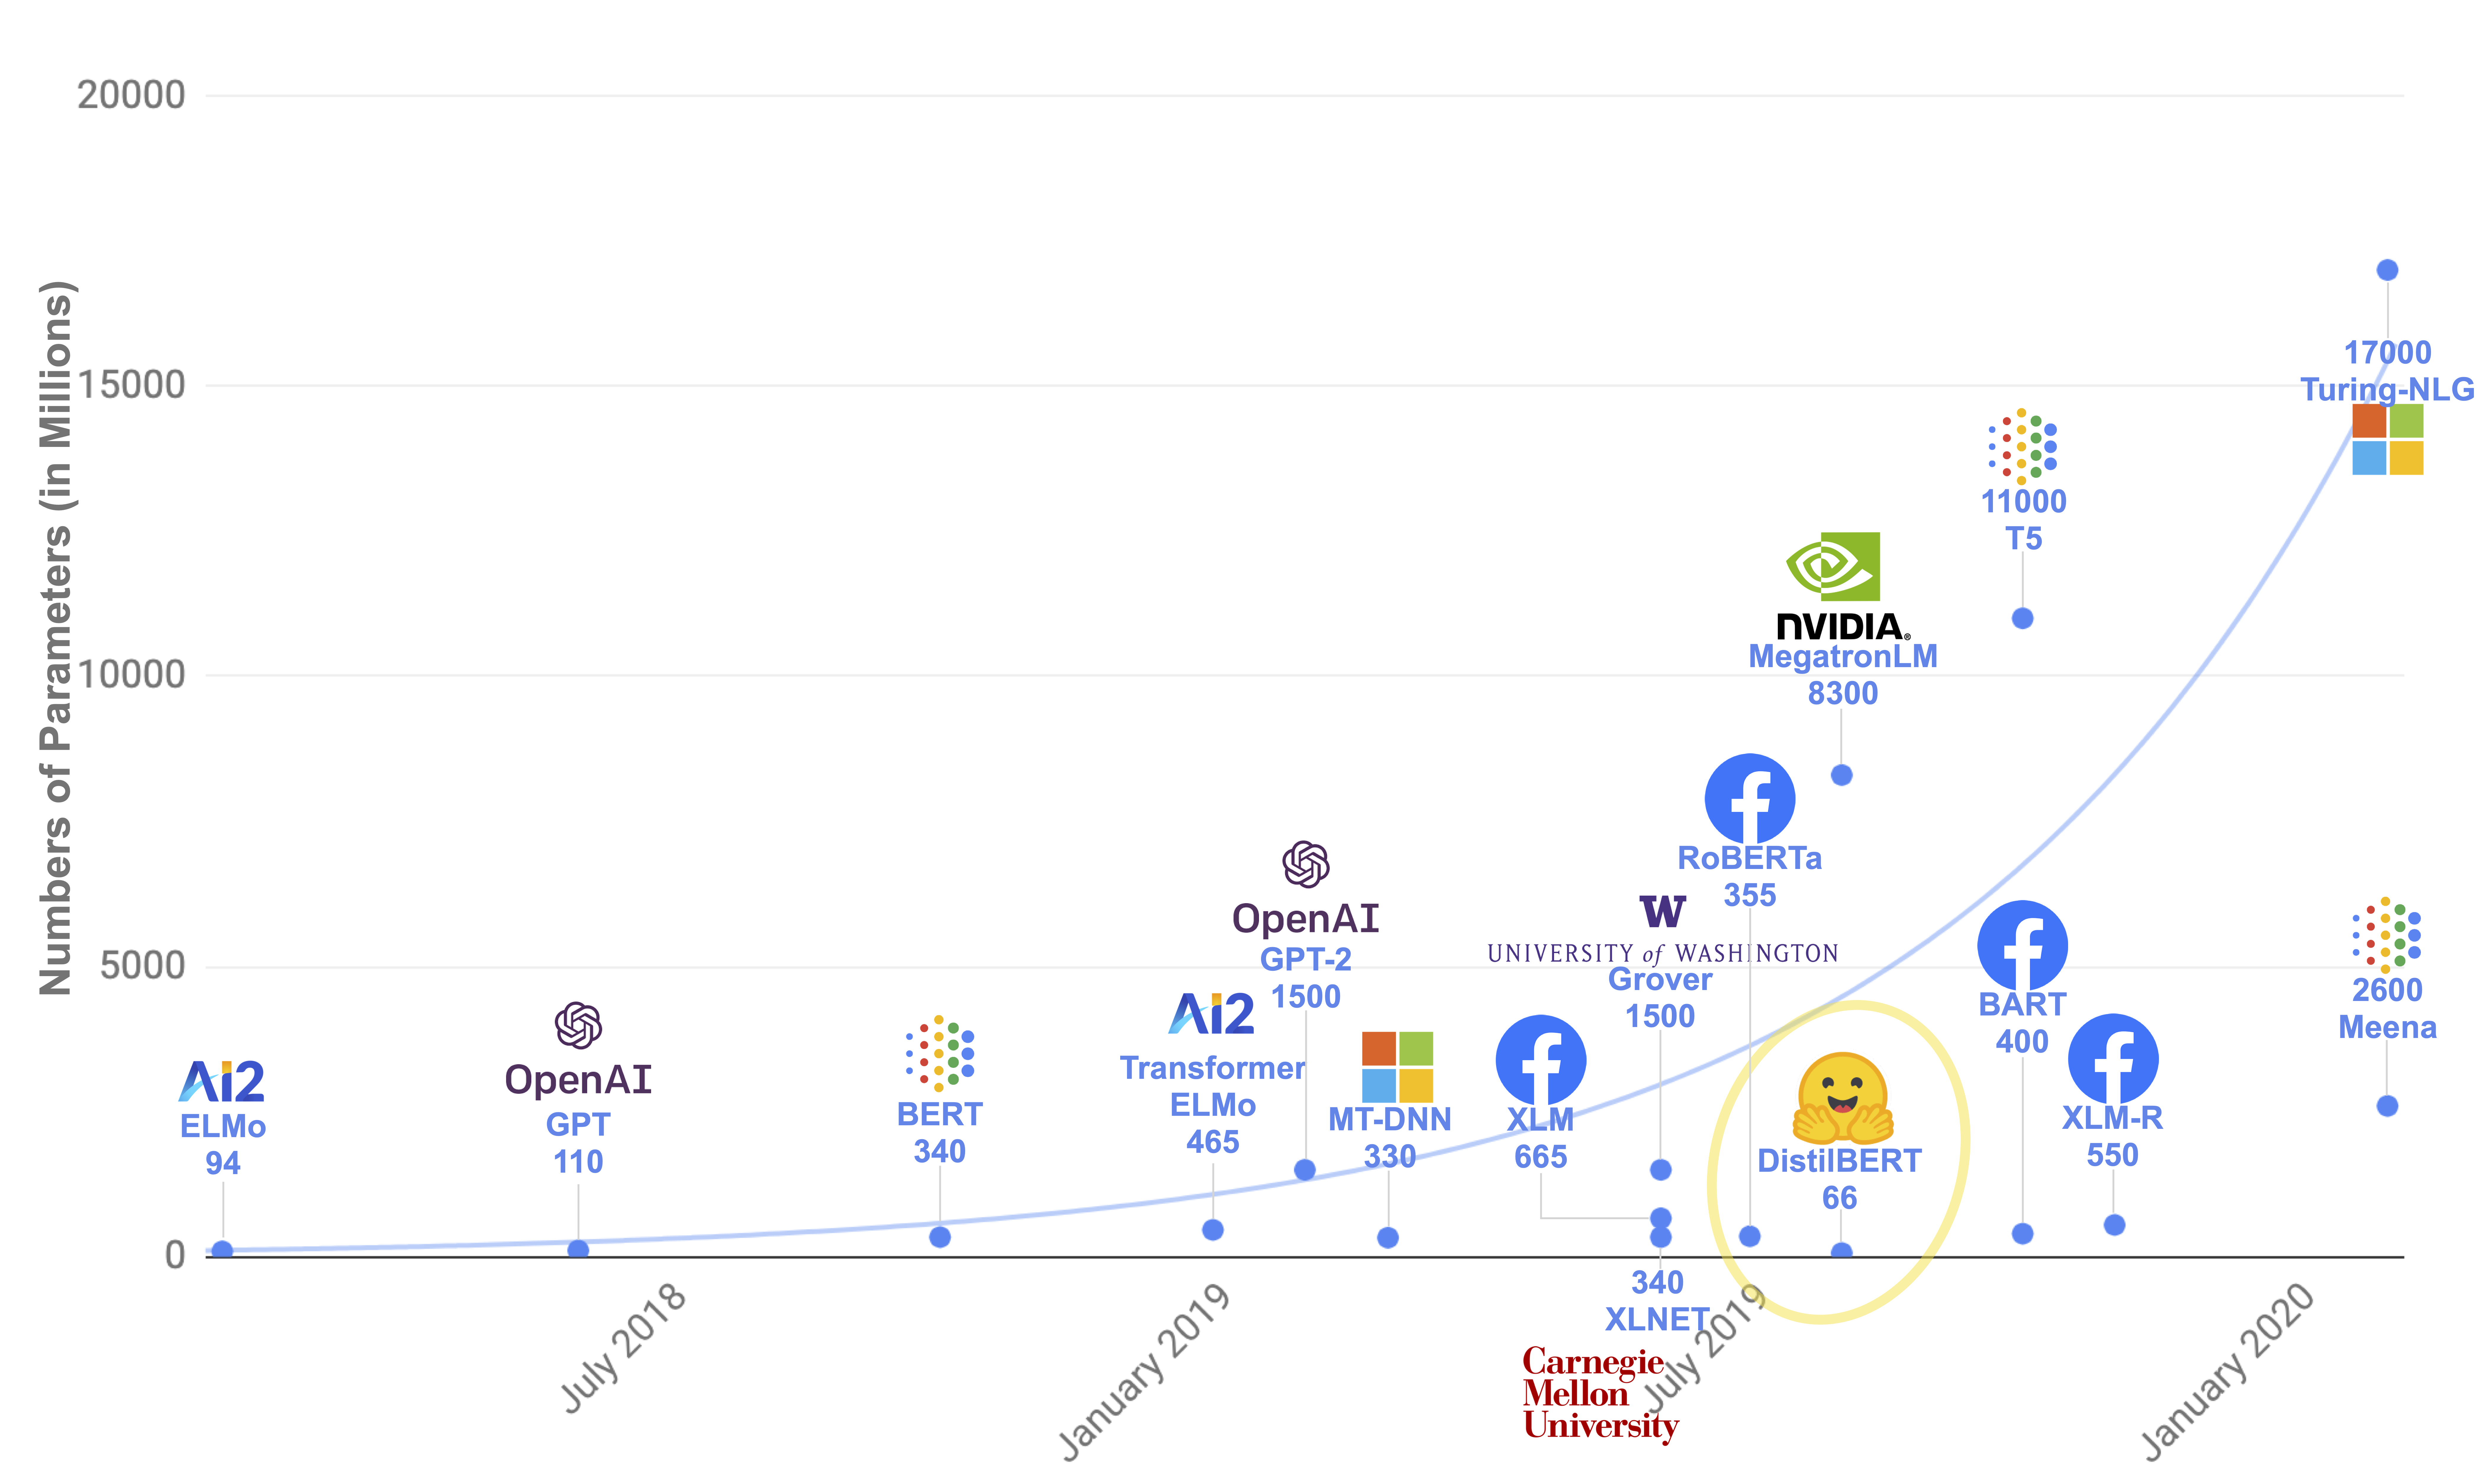

Unfortunately, training a model, especially a large one, requires a large amount of data. This becomes very costly in terms of time and compute resources. It even translates to environmental impact, as can be seen in the following graph.

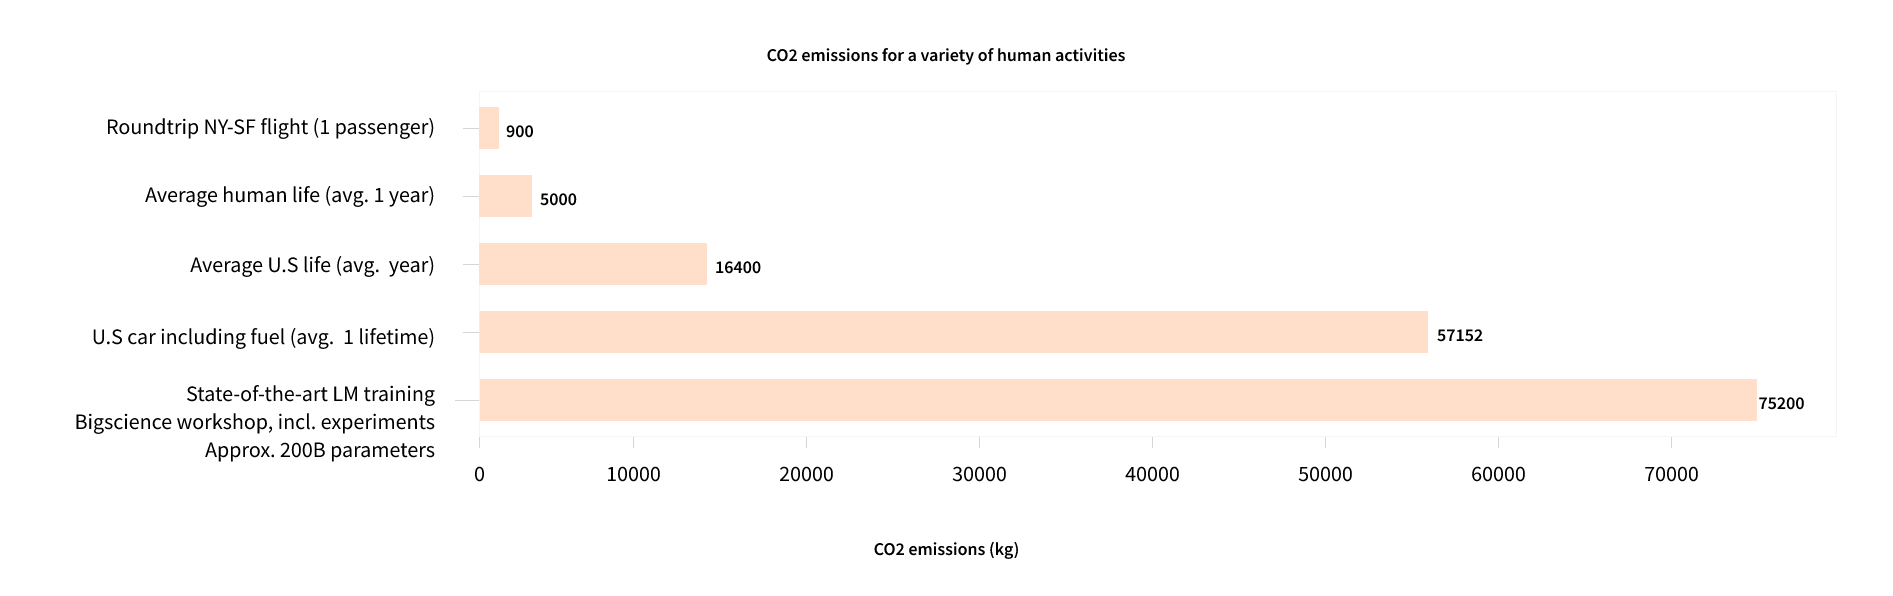

https://youtu.be/ftWlj4FBHTg

And this is showing a project for a (very big) model led by as team consciously trying to reduce the environmental impact of pretraining. The footprint of running lots of trails t get the best hyperparameters would be even higher.

Imagine if each time a research team, a study organization, or a company wanted to train a model, it did so from scratch. This would lead to huge, unnecessary global costs!

This is why sharing language models is paramount: sharing the trained weights and building on top of already trained weights reduces the overall compute cost and carbon footprint of the community.

By the way, you can evaluate the carbon footprint of your models' training through several tools. For example ML CO2 Impact (https://mlco2.github.io/impact/) or Code Carbon (https://codecarbon.io/) which is integrated in 🤗 Transformers. To learn more about this, you can read this blog post (https://huggingface.co/blog/carbon-emissions-on-the-hub) which will show you how to generation an [emmissions.csv] file with an estimate of the footprint of your training, as well as the documentation of 🤗 Transformers addressing this topic.

## Transfer Learning

https://youtu.be/BqqfQnyjmgg

*Pretraining* is the act of training a model from scratch: the weights are randomly initialized, and the training starts without any prior knowledge.

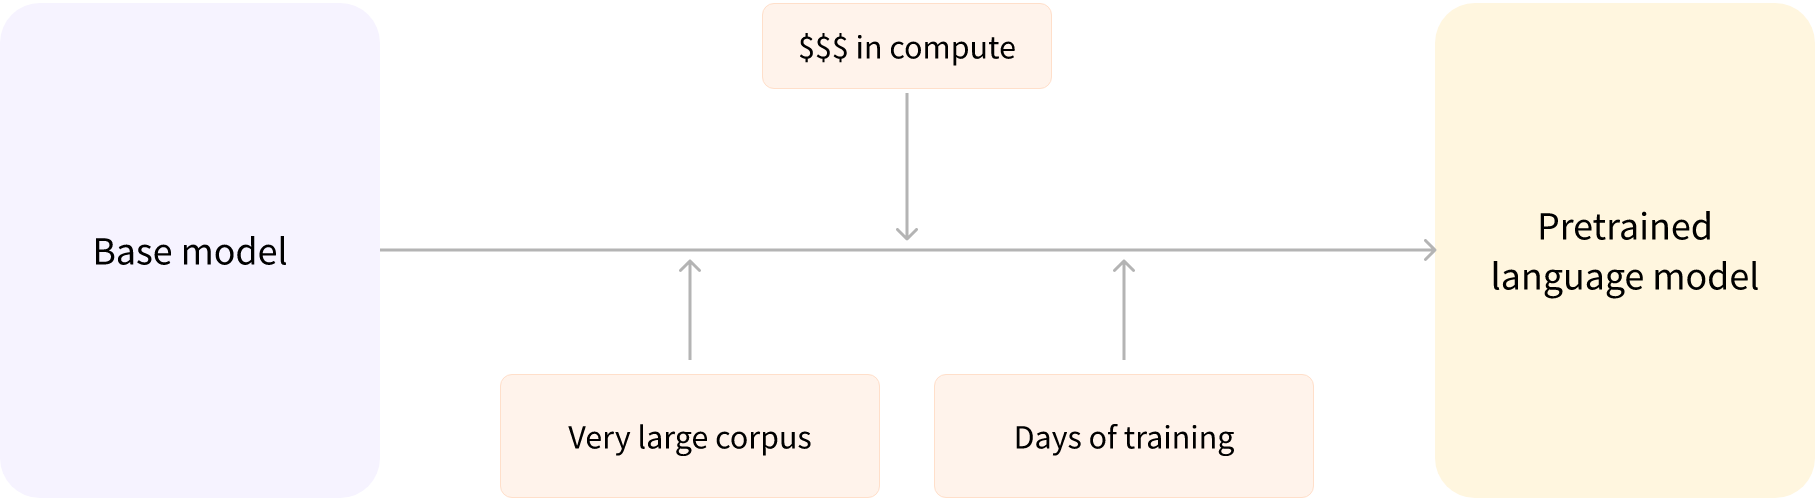

This pretraining is usually done on very large amounts of data. Therefore, it requires a very large corpus of data, and training can take up to several weeks.

*Fine-tuning*, on the other hand, is the training done **after** a model has been pretrained. To perform fine-tuning, you first acquire a pretrained language model, then perform additional training with a dataset specific to your task. Wait - why not simply train directly for the final task? There are a couple of reasons:

- The pretrained model was already trained on a dataset that has some similarities with the fine-tuning dataset. The fine-tuning process is thus able to take advantage of knowledge acquired by the initial model during pretraining (for instance, with NLP problem, the pretrained model will have some kind of statistical understanding of the language you are using for your task).
- Since the pretrained model was already trained on lots of data, the fine-tuning requires way less data to get decent results.
- For the same reason, the amount of time and resources needed to get good results are much lower.

For example, one could leverage a pretrained model trained on the English language and then fine-tune it on an arXiv corpus, tresulting in a science/research-based model. The fine-tuning will only require a limited amount of data: the knowledge the pretrained model has acquired is "transferred," hence the term *transfer learning*.

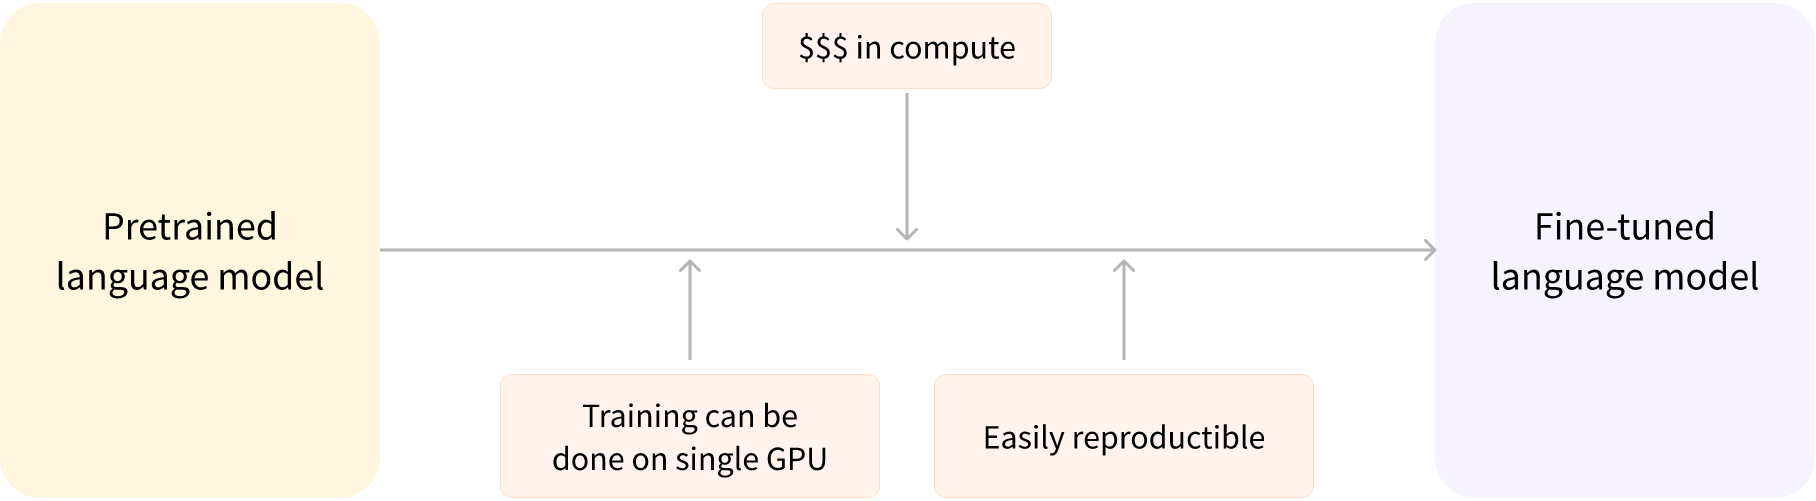

Fine-tuning a model therefore has lower time, data, financial, and environmental costs. It is also quicker and easier to iterate over different fine-tuning schemes, as the training is less constraining than a full pretraining.

This process will also achieve better results than training from scratch